Calculated Energies for 1D Harmonic Oscillator: 
4.999957348893897
14.99893318527705
24.98722072268636
34.89958659462934
44.37425486787529
Allowed Energies for 1D Harmonic Oscillator:
5.0
15.0
25.0
35.0
45.0


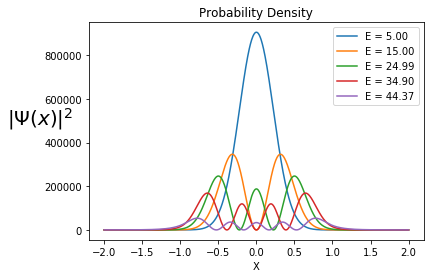

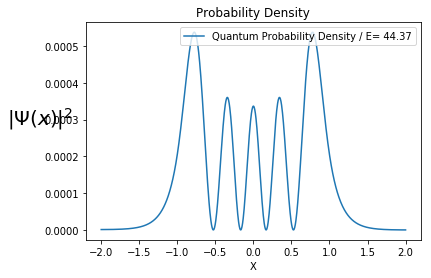

In [1]:
from scipy.integrate import odeint
from scipy.optimize import brentq
import matplotlib.pyplot as plt
import numpy as np 
     
N = 1000                     
b = 2                     # point outside of HO to check if the function diverges
k = 100                   # spring constant 
m = 1                   # mass of object
w = np.sqrt(k/m)          # HO frequency 
h = 1                     # normalized Planck constant
L = 1                     # size of the HO  
x = np.linspace(-b, b, N) # x-axis
psi = np.zeros([N,2])     # Wave function values and its derivative (psi and phi)
psi_init = np.array([.001,0]) # Wave function initial states
E = 0.0                   # global variable Energy  needed for Sch.Eq, changed in function "WF"
l=1
y = np.linspace(-l,l,N)

#Define the potential function in the region of H.O. 
#and check that x is indeed in the H.O. region.  
def V(x):
    if abs(x)< L:
        return 0.5*k*x**2
    else:
        return 0.5*k*L**2         
    
#Returns the first and second derivative of schrodinger equation
def S(psi, x):
    dpsi = psi[1]
    dphi = (2.0*m/h**2)*(V(x) - E)*psi[0]
    return np.array([dpsi, dphi])
 
#calculate wave function for given energy and return value at that point.   
def WF(ener):
    global psi
    global E
    E = ener
    psi = odeint(S, psi_init, x)
    return psi[-1,0]
 
#Returns zeros at y=f(x) using the Brent method.
def Z(x,y):
    zeroes = []   
    s = np.sign(y)
    for i in range(len(y)-1):
        if s[i]+s[i+1] == 0:
            zero = brentq(WF, x[i], x[i+1])
            zeroes.append(zero)
    return zeroes

#general formula for classical probability density function; primarily illustrative purposes   
def C(y):
        return 1/(w*np.sqrt(np.pi)*(np.sqrt(l**2-y**2)))  

# Energies for stable states        
en = np.linspace(0, 0.5*k*L**2, 50)
     
    
# Wave function at x = b for all of the energies in en
psi_end = []      

#Calculatae the known energy eigenvalues for H.O. to compare to calculated energies.
def KE(en):
    Emax = max(en)
    print ('Allowed Energies for 1D Harmonic Oscillator:')
    n = 0
    while((n+0.5)*h*w < Emax):
        print (((n+0.5)*h*w))
        n+=1     

# For each energy e1 find the the psi(x) outside of HO 
for e1 in en:
    psi_end.append(WF(e1))  

# Find energies where psi(b) = 0    
E0 = Z(en, psi_end)    
    
# Print energies for the calculated energy states.
print ("Calculated Energies for 1D Harmonic Oscillator: ")
for En in E0:
    print(En)
    
# Print energies of each bound state from the analytical model
KE(en)   

#utilize if/else to keep data readable.
#set (mass) equal to one (m=1) to plot the first 5 eigenstates and final eigenstate; 
#set (mass) equal to one hundred thirty (m = 130) to plot high energy eigenstate probability versus classical probability
if E0[-1]<49:
#Plot the probability density for 1st 5 eigenstates
    for i in range(5):                                                 
        WF(E0[i])                                     
        plt.plot(x, 100**i*psi[:,0]**2,label="E = %.2f" %E0[i])        
    plt.legend(loc="upper right")
    plt.title('Probability Density')
    plt.xlabel('X')
    plt.ylabel('$|\Psi(x)|^2$', rotation='horizontal', fontsize = 20)    
    plt.show()

#Plot the probability density for final eigenstate    
    WF(E0[-1])                                        
    plt.plot(x, psi[:,0]**2, label="Quantum Probability Density / E= %.2f"%E0[-1])    
    plt.legend(loc="upper right")
    plt.title('Probability Density')
    plt.xlabel('X')
    plt.ylabel('$|\Psi(x)|^2$', rotation='horizontal', fontsize = 20)    
    plt.show()

# Plot the probability density for final eigenstate and general approximate probability of classical
else:
    C(y)
        
    
    WF(E0[-1])                                        
    plt.plot(x, psi[:,0]**2, label="Quantum Probability Density")    
    plt.plot(y,2000*C(y), label="Classical Probability Density")
    plt.legend(loc="upper right")
    plt.title('Probability Density')
    plt.xlabel('X')
    plt.ylabel('$|\Psi(x)|^2$', rotation='horizontal', fontsize = 20)    
    plt.show()
